In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "data/plant-seedlings/"

In [4]:
sz = 224
arch = resnet50
bs = 64
# try 224, 58 and 299, 58

In [5]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [6]:
label_df = pd.read_csv(label_csv)

## Removing space between class names

In [7]:
label_df.species = label_df.species.apply(lambda x: re.sub(' ', '_', x))
label_df.to_csv(f'{PATH}labels.csv', index=False)

## Pivot table

In [7]:
label_df.pivot_table(index='species', aggfunc=len).sort_values('file', ascending=False)

,file
species,
Loose_Silky-bent,654
Common_Chickweed,611
Scentless_Mayweed,516
Small-flowered_Cranesbill,496
Fat_Hen,475
Charlock,390
Sugar_beet,385
Cleavers,287
Black-grass,263


In [8]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                        val_idxs=val_idxs, tfms=tfms, bs=bs)
    return data if sz>300 else data.resize(340, 'tmp')

In [9]:
data = get_data(sz, bs)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [11]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 75%|███████▌  | 45/60 [00:17<00:05,  2.58it/s, loss=12.9]

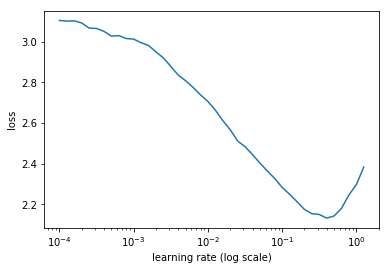

 75%|███████▌  | 45/60 [00:30<00:10,  1.50it/s, loss=12.9]

In [12]:
learn.sched.plot()

In [13]:
learn.fit(1e-2, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


 95%|█████████▌| 57/60 [00:03<00:00, 14.53it/s, loss=1.19]
                                                          [ 0.       1.19307  0.6557   0.78356]

  2%|▏         | 1/60 [00:03<03:30,  3.57s/it, loss=1.09] 

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[ 1.       0.77085  0.54055  0.81181]                      
[ 2.       0.57871  0.46437  0.83349]                      



In [14]:
learn.fit(1e-2, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       0.38305  0.43545  0.83368]                      
[ 1.       0.37532  0.40551  0.85822]                      



In [15]:
from sklearn import metrics

In [16]:
data = get_data(sz, bs)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [17]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [18]:
learn.fit(1e-2, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       1.34968  0.72811  0.76397]                     
[ 1.       0.92262  0.5554   0.81852]                      



In [19]:
learn.precompute=False
learn.bn_freeze=True

In [20]:
learn.fit(1e-2, 5, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[ 0.       0.7089   0.51506  0.81852]                      
[ 1.       0.66756  0.49657  0.8333 ]                      
[ 2.       0.60593  0.46665  0.84097]                      
[ 3.       0.58144  0.44353  0.85517]                      
[ 4.       0.55741  0.43213  0.84911]                      



In [21]:
learn.save('224_r50')

In [22]:
learn.load('224_r50')

In [23]:
learn.set_data(get_data(299, bs))
learn.freeze()

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [24]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.61144  0.42009  0.85907]                      
[ 1.       0.57933  0.41754  0.85887]                      
[ 2.       0.53984  0.39302  0.86655]                      



In [25]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.49915  0.38679  0.86512]                      
[ 1.       0.51905  0.37351  0.87176]                      
[ 2.       0.47729  0.36121  0.87261]                      
[ 3.       0.46586  0.38032  0.86883]                      
[ 4.       0.45537  0.34056  0.88738]                      
[ 5.       0.43281  0.32975  0.88843]                      
[ 6.       0.40186  0.33108  0.88094]                      



In [26]:
learn.save('299_r50')

In [27]:
learn.load('299_r50')

In [28]:
learn.set_data(get_data(350, bs))
learn.freeze()

In [29]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.44803  0.31199  0.88777]                      
[ 1.       0.42558  0.29817  0.89402]                      
[ 2.       0.40669  0.29369  0.89174]                      



In [30]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.38232  0.28808  0.89904]                      
[ 1.       0.3799   0.29133  0.88653]                      
[ 2.       0.36774  0.27691  0.90197]                      
[ 3.       0.3939   0.28462  0.89884]                      
[ 4.       0.36789  0.26386  0.90718]                      
[ 5.       0.34554  0.2473   0.9159 ]                      
[ 6.       0.32724  0.25268  0.90945]                      



In [31]:
learn.save('350_r50')

In [32]:
learn.load('350_r50')

In [34]:
log_preds, y = learn.TTA()
probs = np.exp(log_preds)

In [35]:
accuracy(log_preds, y)

0.9357894736842105

In [ ]:
metrics.f1_score()

In [36]:
learn.save('350_r50')

In [37]:
log_preds, y = learn.TTA(is_test=True)
probs_350 = np.exp(log_preds)

In [38]:
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()

In [39]:
save_array('probs_350.bc', probs_350)

In [40]:
learn.fit(1e-2, 1, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       0.33743  0.25277  0.91674]                      
[ 1.       0.31849  0.25903  0.90822]                      



In [41]:
learn.save('350_r50')

In [42]:
log_preds, y = learn.TTA(is_test=True)
probs_350 = np.exp(log_preds)

In [43]:
save_array('probs_350.bc', probs_350)

## Use whole dataset now

In [ ]:
learn.load('299_pre')

In [ ]:
def get_data_whole(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                        val_idxs=[0], suffix='.jpg', tfms=tfms, bs=bs)
    return data if sz>300 else data.resize(340, 'tmp')

In [ ]:
data = get_data_whole(sz, bs)

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.freeze()

In [ ]:
learn.fit(1e-2, 5)

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [ ]:
learn.fit(1e-2, 2)

In [ ]:
learn.precompute = False
learn.bn_freeze = True

In [ ]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.set_data(get_data_whole(299, bs))
learn.freeze()

In [ ]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

In [ ]:
log_preds, y = learn.TTA(is_test=True)
probs_resnx101_64_full = np.exp(log_preds)
#accuracy(log_preds, y), metrics.log_loss(y, probs)

In [ ]:
save_array('probs_resnx101_64_full.bc', probs_resnx101_64_full)

In [ ]:
learn.save('299_full')

## Try ensembling
### Use another arch first

## Save to file for submission

In [44]:
data.classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common_Chickweed',
 'Common_wheat',
 'Fat_Hen',
 'Loose_Silky-bent',
 'Maize',
 'Scentless_Mayweed',
 'Shepherds_Purse',
 'Small-flowered_Cranesbill',
 'Sugar_beet']

In [49]:
df = pd.DataFrame(np.argmax(probs_350, axis=1))

In [50]:
df

,0
0,11
1,1
2,2
3,2
4,5
5,5
6,10
7,10
8,10
9,11


In [55]:
data.classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common_Chickweed',
 'Common_wheat',
 'Fat_Hen',
 'Loose_Silky-bent',
 'Maize',
 'Scentless_Mayweed',
 'Shepherds_Purse',
 'Small-flowered_Cranesbill',
 'Sugar_beet']

In [52]:
df.insert(0, 'file', [o[5:-4] for o in data.test_ds.fnames])

In [63]:
df.columns = ['file', 'species']

In [65]:
df.species = df.species.apply(lambda x: data.classes[x])

In [67]:
df.species = df.species.apply(lambda x: re.sub('_', ' ', x))

In [70]:
df.file = df.file.apply(lambda x: str(x) + '.png')

In [71]:
df

,file,species
0,780bd2a2c.png,Sugar beet
1,338c7e907.png,Charlock
2,4bbfd1e05.png,Cleavers
3,6edb96d45.png,Cleavers
4,a8388a37f.png,Fat Hen
5,2a667e099.png,Fat Hen
6,8b9144917.png,Small-flowered Cranesbill
7,44e8b8833.png,Small-flowered Cranesbill
8,a2d25b4f3.png,Small-flowered Cranesbill
9,e783f5a4f.png,Sugar beet


In [72]:
SUBM = f'{PATH}results/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}submission2.csv', index=False)
#df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)